In [91]:
using LaTeXStrings
using Plots
using PlotThemes
using LinearAlgebra
using SparseArrays
theme(:wong;)

In [132]:
ϵ = 0.2
μ = 0.1
Δx = 0.4
Δt = 0.1
Nₓ = 130
Nₜ = 2000
L = floor(Int,Nₓ*Δx)
t_end = floor(Int,Nₜ*Δt)

xs = Δx:Δx:L
ts = 0:Δt:t_end

u0 = [1/2*(1-tanh((x-25)/5)) for x in xs];

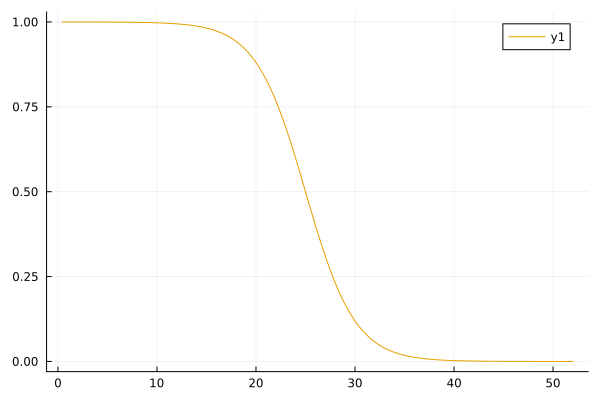

In [133]:
plot(xs, u0)

In [134]:
println(L"Holds as long c $\<=$ 2x ", (Δx/Δt - 4*μ/Δx^2)/ϵ)

Holds as long c $\<=$ 2x 7.500000000000002


In [135]:
# TODO Iterator

u = zeros(Nₓ,Nₜ+1)
u[:,1] = copy(u0)

a = -ϵ/6*Δt/Δx
A = Tridiagonal([a for _ in 2:Nₓ], [a for _ in 1:Nₓ], [a for _ in 2:Nₓ])
# A[1,2] = 0
B = Tridiagonal([1. for _ in 2:Nₓ], [0. for _ in 1:Nₓ], [1. for _ in 2:Nₓ])
# B[1,2] = 0
c = -μ/2*Δt/Δx^3
C = zeros(Nₓ, Nₓ)
for i in 1:Nₓ
   for j in 1:Nₓ
      if j==i+2 || j==i+1 || j==i-2 || j==i-1
      C[i,j] = c
      end
   end
end
C[1,:] .= 0.
C[1,1] = 1.
C = sparse(C)
# First steps

u[:,2] = u[:,1] + (A * u[:,1]) .* (B*u[:,1]) + (C * u[:,1])

for i in 2:Nₜ
   u[:,i+1] = u[:,i-1]+ (A * u[:,i]) .* (B*u[:,i]) + (C * u[:,i])
end;

In [136]:
f = (x,t) -> u[floor(Int, x/Δx), floor(Int, t/Δt)] 

#537 (generic function with 1 method)

In [138]:
print(t_end)

200

In [145]:
f(15,2)

-2.5141264651967203

In [129]:
plot(xs,ts,f,st=:surface,camera=(-30,30))

BoundsError: BoundsError: attempt to access 130×2001 Matrix{Float64} at index [2, 2002]